#Задание

**Цель:**.
Изучить методы отбора признаков для эффективного обучения моделей машинного обучения.  
**Описание задания:**  
В домашнем задании нужно решить задачу классификации точек наиболее эффективно. Для этого в работе необходимо применить различные методы по отбору признаков. Отбор признаков предпочтительнее осуществлять основываясь на математическом аппарате, поэтому данные для этого задания будут сгенерированы, чтобы избежать признаков с физическим смыслом.

#### 1.Сгенерируйте данные с помощью кода:
from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification(scale=1)

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
x_data_generated, y_data_generated = make_classification(scale=1, random_state=0)

In [ ]:
x_data_generated.shape

(100, 20)

In [ ]:
y_data_generated

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0])

### 2.Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код:
cross_val_score(LogisticRegression(), x, y, scoring=‘accuracy’).mean()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
model = LogisticRegression()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_data_generated, y_data_generated, test_size=0.3, random_state=42)

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
cross_val_score(LogisticRegression(), X_train, y_train, scoring='accuracy').mean()

0.8857142857142856

In [ ]:
score_mean = cross_val_score(LogisticRegression(), X_test, y_test, scoring='accuracy').mean()
score_mean

0.9333333333333333

In [ ]:
# создание таблицы с результатами
df_conclusion = pd.DataFrame(columns = ['way_fs', 'amount_features', 'score_mean'])
df_conclusion

,way_fs,amount_features,score_mean


In [ ]:
# добавление результатов в таблицу сравнений
df_conclusion = df_conclusion.append({
'way_fs' : 'none',
'amount_features' : X_train.shape[1],
'score_mean' : score_mean
}, ignore_index=True)

### 3.Используйте статистические методы для отбора признаков:


#### a) Выберите признаки на основе матрицы корреляции.

In [ ]:
import pandas as pd

In [ ]:
data = pd.DataFrame(data = x_data_generated)

In [ ]:
data['20'] = y_data_generated

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.039268,0.131912,-0.211206,-1.214147,1.050045,-0.421328,0.768771,0.875696,2.451230,-0.480242,...,-0.523251,0.708695,-1.980566,-1.365163,-0.948933,1.947099,1.976989,1.021225,-0.469311,0
1,0.774161,0.104907,-0.332812,-1.270350,0.379113,-0.822828,-0.612626,1.496140,0.568459,-0.467493,...,-0.862493,-0.631192,0.133913,-0.972403,-0.774459,1.346221,1.267804,0.622519,-1.490265,0
2,-0.014858,0.670570,-0.214167,0.250202,0.055489,-1.566995,0.039767,0.265688,1.849591,0.719984,...,-1.102906,0.019279,-0.707506,0.723100,0.821406,0.024612,-0.104862,-0.101697,-0.451303,1
3,0.038909,-1.557999,-0.024549,0.216543,0.065274,-0.675594,0.844996,2.042072,-1.102230,-1.692370,...,0.729346,-0.298760,-0.507035,0.038118,0.626564,-0.578918,-0.071560,0.699136,-0.993361,1
4,0.936446,1.265078,-0.510293,-0.683049,-1.127849,0.679975,-0.704921,-0.290397,-0.386871,-0.803141,...,-0.464338,-0.552541,0.211497,1.327783,-0.035095,-0.101281,-0.800221,1.021791,-0.696327,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.104343,-1.177629,1.696182,-0.136509,0.577823,-0.132988,1.754986,0.555787,0.448195,-1.824257,...,0.303604,-1.661598,-1.140196,0.010349,-0.988002,0.720034,0.733900,0.772695,-0.765702,1
96,0.183925,-1.601836,-1.284552,0.923281,-0.623043,1.243319,-0.932789,0.587259,0.564009,-0.507518,...,-1.051880,-2.245322,-0.887181,-0.505358,-0.385490,-0.815792,-1.308135,2.497200,0.812674,1
97,0.296733,-0.496102,-0.864045,1.709102,0.030155,1.569260,0.012232,0.796672,-0.406303,0.225582,...,1.389145,-0.306766,-0.074805,-0.657926,0.829986,0.968883,-1.104540,2.014060,0.690429,1
98,0.086177,0.983636,0.171244,-0.008118,1.896342,-0.390798,0.252331,-1.406105,-0.647054,2.153120,...,0.468305,0.657268,-0.085615,-1.604739,2.190898,1.458715,2.115647,0.112738,1.209850,1


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

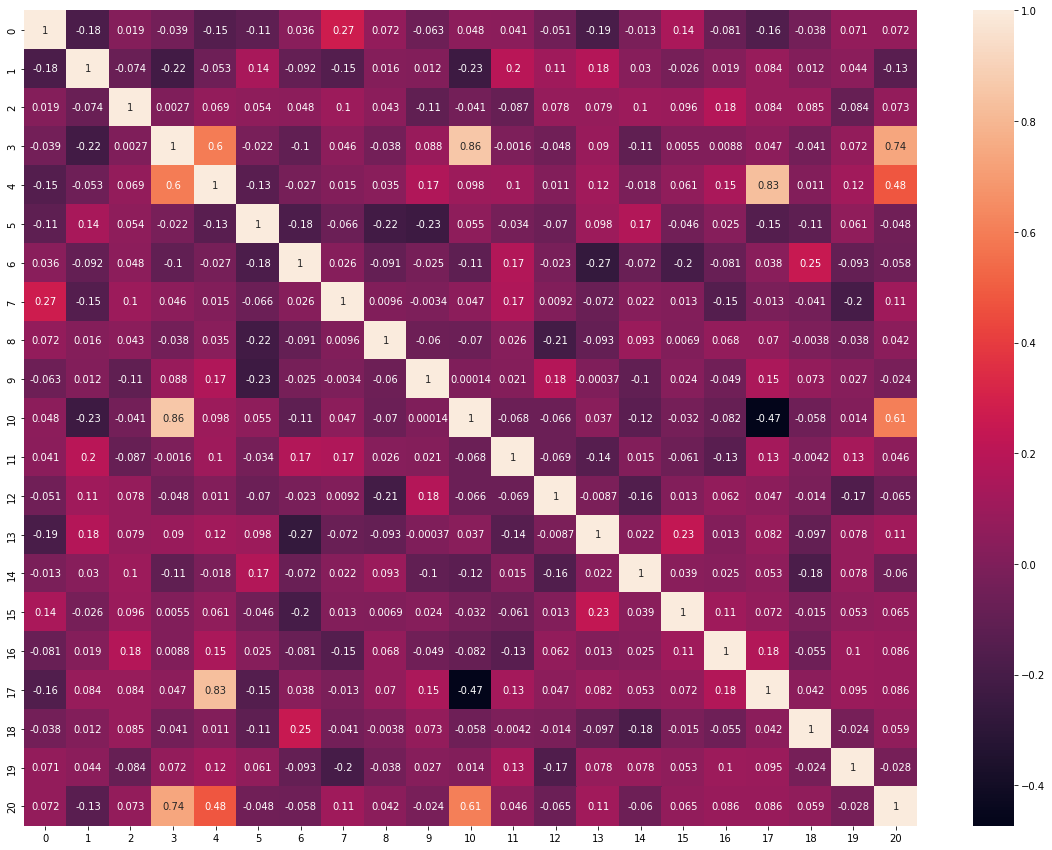

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)
plt.show()

Сильно коррелируют 3 и 10, 4 и 17, 10 и 20 удалим 3 и 4, 10 признаки

In [ ]:
data_new = data.drop(columns = [3, 4, 10])

In [ ]:
data_new

,0,1,2,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20
0,-0.039268,0.131912,-0.211206,-0.421328,0.768771,0.875696,2.451230,-0.480242,-0.523251,0.708695,-1.980566,-1.365163,-0.948933,1.947099,1.976989,1.021225,-0.469311,0
1,0.774161,0.104907,-0.332812,-0.822828,-0.612626,1.496140,0.568459,-0.467493,-0.862493,-0.631192,0.133913,-0.972403,-0.774459,1.346221,1.267804,0.622519,-1.490265,0
2,-0.014858,0.670570,-0.214167,-1.566995,0.039767,0.265688,1.849591,0.719984,-1.102906,0.019279,-0.707506,0.723100,0.821406,0.024612,-0.104862,-0.101697,-0.451303,1
3,0.038909,-1.557999,-0.024549,-0.675594,0.844996,2.042072,-1.102230,-1.692370,0.729346,-0.298760,-0.507035,0.038118,0.626564,-0.578918,-0.071560,0.699136,-0.993361,1
4,0.936446,1.265078,-0.510293,0.679975,-0.704921,-0.290397,-0.386871,-0.803141,-0.464338,-0.552541,0.211497,1.327783,-0.035095,-0.101281,-0.800221,1.021791,-0.696327,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.104343,-1.177629,1.696182,-0.132988,1.754986,0.555787,0.448195,-1.824257,0.303604,-1.661598,-1.140196,0.010349,-0.988002,0.720034,0.733900,0.772695,-0.765702,1
96,0.183925,-1.601836,-1.284552,1.243319,-0.932789,0.587259,0.564009,-0.507518,-1.051880,-2.245322,-0.887181,-0.505358,-0.385490,-0.815792,-1.308135,2.497200,0.812674,1
97,0.296733,-0.496102,-0.864045,1.569260,0.012232,0.796672,-0.406303,0.225582,1.389145,-0.306766,-0.074805,-0.657926,0.829986,0.968883,-1.104540,2.014060,0.690429,1
98,0.086177,0.983636,0.171244,-0.390798,0.252331,-1.406105,-0.647054,2.153120,0.468305,0.657268,-0.085615,-1.604739,2.190898,1.458715,2.115647,0.112738,1.209850,1


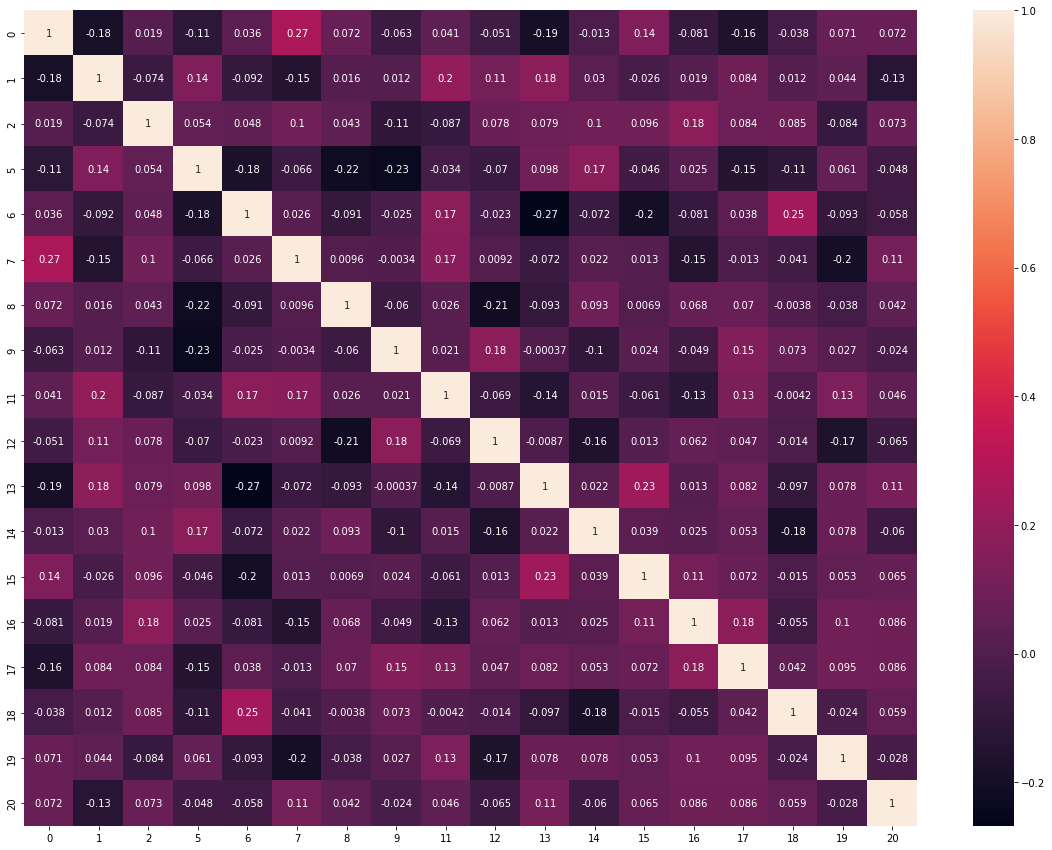

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(data_new.corr(),annot=True)
plt.show()

#### b) Отсеките низковариативные признаки (VarianceThreshold).


In [ ]:
data_new.describe()

,0,1,2,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.201157,-0.065166,-0.018295,0.115880,-0.075522,-0.005361,0.021322,-0.027685,-0.023084,-0.207044,-0.141198,-0.023329,0.018780,0.181383,-0.048769,0.219853,-0.146823,0.500000
std,0.922000,1.069395,0.983718,0.984095,1.012048,0.996747,0.971359,0.902705,0.961196,1.057656,0.849718,0.968637,1.010862,0.933198,1.290100,1.086226,0.884002,0.502519
min,-2.582797,-2.288620,-2.047324,-2.534554,-2.994613,-2.201441,-2.369587,-2.364174,-3.046143,-2.772593,-2.655619,-2.802203,-2.559185,-2.739677,-3.697436,-2.659172,-2.777359,0.000000
25%,-0.921699,-0.934301,-0.715116,-0.501400,-0.766034,-0.716149,-0.649928,-0.577944,-0.642868,-0.836743,-0.638901,-0.630963,-0.779124,-0.324188,-0.865390,-0.419274,-0.617423,0.000000
50%,-0.109559,0.027124,-0.003218,-0.030744,-0.118444,-0.088977,0.069606,0.027899,0.037074,-0.257947,-0.116167,-0.035884,0.011961,0.199813,-0.143879,0.311192,-0.214775,0.500000
75%,0.276811,0.833921,0.541453,0.764341,0.591959,0.654702,0.565121,0.636705,0.533407,0.553182,0.313104,0.622525,0.638560,0.829577,0.766881,0.806619,0.397050,1.000000
max,2.594425,2.488442,2.412454,2.642936,2.149575,2.290467,2.680571,2.153120,2.339625,2.759355,2.232016,2.526368,2.540232,2.225944,2.633259,3.170975,2.320800,1.000000


In [ ]:
from  sklearn.feature_selection import VarianceThreshold

In [ ]:
X_1_train, X_1_test, y_1_train, y_1_test =train_test_split(data_new.drop(labels=['20'], axis=1), data_new['20'], test_size=0.3, random_state=42)

In [ ]:
X_1_train.shape

(70, 17)

In [ ]:
selector = VarianceThreshold(threshold=0.75)

In [ ]:
new_X_train = selector.fit(X_1_train)

In [ ]:
len(X_1_train.columns[selector.get_support()])

15

In [ ]:
constant_columns = [column for column in X_1_train.columns if column not in X_1_train.columns[selector.get_support()]]
print(len(constant_columns))

2


In [ ]:
# вывод лишних колонок
for column in constant_columns:
    print(column)

13
16


In [ ]:
X_1_train = selector.transform(X_1_train)
X_1_test = selector.transform(X_1_test)

X_1_train.shape, X_1_test.shape

((70, 15), (30, 15))

#### c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.

In [ ]:
model.fit(X_1_train, y_1_train)

LogisticRegression()

In [ ]:
cross_val_score(LogisticRegression(), X_1_train, y_1_train, scoring='accuracy').mean()

0.5

In [ ]:
score_mean_vt = cross_val_score(LogisticRegression(), X_1_test, y_1_test, scoring='accuracy').mean()
score_mean_vt

0.5

a) Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.

In [ ]:
# добавление результатов в таблицу сравнений
df_conclusion = df_conclusion.append({
'way_fs' : 'VarianceThreshold',
'amount_features' : X_1_train.shape[1],
'score_mean' : score_mean_vt
}, ignore_index=True)

### 4.Осуществите отбор признаков на основе дисперсионного анализа:


#### a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).


In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.039268,0.131912,-0.211206,-1.214147,1.050045,-0.421328,0.768771,0.875696,2.451230,-0.480242,...,-0.523251,0.708695,-1.980566,-1.365163,-0.948933,1.947099,1.976989,1.021225,-0.469311,0
1,0.774161,0.104907,-0.332812,-1.270350,0.379113,-0.822828,-0.612626,1.496140,0.568459,-0.467493,...,-0.862493,-0.631192,0.133913,-0.972403,-0.774459,1.346221,1.267804,0.622519,-1.490265,0
2,-0.014858,0.670570,-0.214167,0.250202,0.055489,-1.566995,0.039767,0.265688,1.849591,0.719984,...,-1.102906,0.019279,-0.707506,0.723100,0.821406,0.024612,-0.104862,-0.101697,-0.451303,1
3,0.038909,-1.557999,-0.024549,0.216543,0.065274,-0.675594,0.844996,2.042072,-1.102230,-1.692370,...,0.729346,-0.298760,-0.507035,0.038118,0.626564,-0.578918,-0.071560,0.699136,-0.993361,1
4,0.936446,1.265078,-0.510293,-0.683049,-1.127849,0.679975,-0.704921,-0.290397,-0.386871,-0.803141,...,-0.464338,-0.552541,0.211497,1.327783,-0.035095,-0.101281,-0.800221,1.021791,-0.696327,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.104343,-1.177629,1.696182,-0.136509,0.577823,-0.132988,1.754986,0.555787,0.448195,-1.824257,...,0.303604,-1.661598,-1.140196,0.010349,-0.988002,0.720034,0.733900,0.772695,-0.765702,1
96,0.183925,-1.601836,-1.284552,0.923281,-0.623043,1.243319,-0.932789,0.587259,0.564009,-0.507518,...,-1.051880,-2.245322,-0.887181,-0.505358,-0.385490,-0.815792,-1.308135,2.497200,0.812674,1
97,0.296733,-0.496102,-0.864045,1.709102,0.030155,1.569260,0.012232,0.796672,-0.406303,0.225582,...,1.389145,-0.306766,-0.074805,-0.657926,0.829986,0.968883,-1.104540,2.014060,0.690429,1
98,0.086177,0.983636,0.171244,-0.008118,1.896342,-0.390798,0.252331,-1.406105,-0.647054,2.153120,...,0.468305,0.657268,-0.085615,-1.604739,2.190898,1.458715,2.115647,0.112738,1.209850,1


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
X_2 = SelectKBest(f_classif, k = 5).fit_transform(x_data_generated, y_data_generated)

In [ ]:
X_2.shape

(100, 5)

#### b) Повторите п. 2 на отобранных признаках.

In [ ]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_data_generated, test_size=0.3, random_state=42)

In [ ]:
model.fit(X_2_train, y_2_train)

LogisticRegression()

In [ ]:
cross_val_score(LogisticRegression(), X_2_train, y_2_train, scoring='accuracy').mean()

0.8857142857142858

In [ ]:
score_mean_SKB = cross_val_score(LogisticRegression(), X_2_test, y_2_test, scoring='accuracy').mean()
score_mean_SKB

0.9333333333333333

In [ ]:
# добавление результатов в таблицу сравнений
df_conclusion = df_conclusion.append({
'way_fs' : 'SelectKBest',
'amount_features' : X_2_train.shape[1],
'score_mean' : score_mean_SKB
}, ignore_index=True)

### 5.Отбор с использованием моделей:


#### a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn import linear_model

In [ ]:
 # готовим модель, которую укажем в качестве estimator для SelectFromModel
 model_l1 =  LogisticRegression(solver='saga', max_iter = 10000, penalty='l1')
 # инициализируем SelectFromModel
 selector_sfm = SelectFromModel(estimator=model_l1)

In [ ]:
# обучаем selector_sfm на своих данных
X_sfm_l1 = selector_sfm.fit_transform(x_data_generated, y_data_generated)

In [ ]:
X_sfm_l1.shape

(100, 12)

#### b) Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.039268,0.131912,-0.211206,-1.214147,1.050045,-0.421328,0.768771,0.875696,2.451230,-0.480242,...,-0.523251,0.708695,-1.980566,-1.365163,-0.948933,1.947099,1.976989,1.021225,-0.469311,0
1,0.774161,0.104907,-0.332812,-1.270350,0.379113,-0.822828,-0.612626,1.496140,0.568459,-0.467493,...,-0.862493,-0.631192,0.133913,-0.972403,-0.774459,1.346221,1.267804,0.622519,-1.490265,0
2,-0.014858,0.670570,-0.214167,0.250202,0.055489,-1.566995,0.039767,0.265688,1.849591,0.719984,...,-1.102906,0.019279,-0.707506,0.723100,0.821406,0.024612,-0.104862,-0.101697,-0.451303,1
3,0.038909,-1.557999,-0.024549,0.216543,0.065274,-0.675594,0.844996,2.042072,-1.102230,-1.692370,...,0.729346,-0.298760,-0.507035,0.038118,0.626564,-0.578918,-0.071560,0.699136,-0.993361,1
4,0.936446,1.265078,-0.510293,-0.683049,-1.127849,0.679975,-0.704921,-0.290397,-0.386871,-0.803141,...,-0.464338,-0.552541,0.211497,1.327783,-0.035095,-0.101281,-0.800221,1.021791,-0.696327,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.104343,-1.177629,1.696182,-0.136509,0.577823,-0.132988,1.754986,0.555787,0.448195,-1.824257,...,0.303604,-1.661598,-1.140196,0.010349,-0.988002,0.720034,0.733900,0.772695,-0.765702,1
96,0.183925,-1.601836,-1.284552,0.923281,-0.623043,1.243319,-0.932789,0.587259,0.564009,-0.507518,...,-1.051880,-2.245322,-0.887181,-0.505358,-0.385490,-0.815792,-1.308135,2.497200,0.812674,1
97,0.296733,-0.496102,-0.864045,1.709102,0.030155,1.569260,0.012232,0.796672,-0.406303,0.225582,...,1.389145,-0.306766,-0.074805,-0.657926,0.829986,0.968883,-1.104540,2.014060,0.690429,1
98,0.086177,0.983636,0.171244,-0.008118,1.896342,-0.390798,0.252331,-1.406105,-0.647054,2.153120,...,0.468305,0.657268,-0.085615,-1.604739,2.190898,1.458715,2.115647,0.112738,1.209850,1


In [ ]:
X_train, X_test, y_train, y_test =train_test_split(data.drop(labels=['20'], axis=1), data['20'], test_size=0.3, random_state=42)

In [ ]:
# инициализация модели
model_tree = RandomForestClassifier(random_state=100, n_estimators=50, max_depth = 5)
# обучение модели на данных
selector_rfm = model_tree.fit(X_train, y_train)

In [ ]:
importances = model_tree.feature_importances_

In [ ]:
imp = pd.Series(importances)
imp.index = pd.Series(X_train.columns)
imp = imp.sort_values(ascending=False)
imp

3     0.280503
10    0.180605
4     0.109196
0     0.044033
5     0.035019
14    0.032294
1     0.029407
19    0.028155
2     0.027576
17    0.027023
6     0.026644
15    0.026420
13    0.025343
18    0.024234
11    0.021500
16    0.019130
9     0.017987
8     0.016396
12    0.016175
7     0.012359
dtype: float64

In [ ]:
# оставляем 5 наиболее важных признаков
cols = imp.head(5)
feat = cols.index

In [ ]:
feat

Int64Index([3, 10, 4, 0, 5], dtype='int64')

In [ ]:
data.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       '20'],
      dtype='object')

In [ ]:
# подготовка списка колонок для удаления
drop_columns = []
for i in data.columns:
    if i not in feat:
        drop_columns.append(i)
drop_columns

[1, 2, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, '20']

In [ ]:
# новый датасет с отобранными 5-ю наиболее важными признаками
data_new_fi = data.drop(columns = drop_columns)

In [ ]:
data_new_fi.shape

(100, 5)

#### c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.

In [ ]:
# обучение после отбора признаков на основе SelectFromModel
X_sfm_train, X_sfm_test, y_sfm_train, y_sfm_test = train_test_split(X_sfm_l1, y_data_generated, test_size=0.3, random_state=42)

In [ ]:
model.fit(X_sfm_train, y_sfm_train)

LogisticRegression()

In [ ]:
cross_val_score(LogisticRegression(), X_sfm_train, y_sfm_train, scoring='accuracy').mean()

0.8714285714285713

In [ ]:
score_mean_sfm = cross_val_score(LogisticRegression(), X_sfm_test, y_sfm_test, scoring='accuracy').mean()
score_mean_sfm

0.8

In [ ]:
# добавление результатов в таблицу сравнений
df_conclusion = df_conclusion.append({
'way_fs' : 'SelectFromModel',
'amount_features' : X_sfm_train.shape[1],
'score_mean' : score_mean_sfm
}, ignore_index=True)

In [ ]:
# обучение после отбора признаков на основе feature_importance (RandomForest)

In [ ]:
X_fi_train, X_fi_test, y_fi_train, y_fi_test = train_test_split(data_new_fi, y_data_generated, test_size=0.3, random_state=42)

In [ ]:
model.fit(X_fi_train, y_fi_train)

LogisticRegression()

In [ ]:
cross_val_score(LogisticRegression(), X_fi_train, y_fi_train, scoring='accuracy').mean()

0.9

In [ ]:
score_mean_fi = cross_val_score(LogisticRegression(), X_fi_test, y_fi_test, scoring='accuracy').mean()
score_mean_fi

0.9333333333333333

In [ ]:
# добавление результатов в таблицу сравнений
df_conclusion = df_conclusion.append({
'way_fs' : 'feature_importance(RF)',
'amount_features' : X_fi_train.shape[1],
'score_mean' : score_mean_fi
}, ignore_index=True)

### 6.Перебор признаков:


####a) SequentialFeatureSelector.


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=3)
sfs.fit(x_data_generated, y_data_generated)
SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=3), n_features_to_select=3)

SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=3),
                          n_features_to_select=3)

In [ ]:
X_sfs = sfs.transform(x_data_generated)
X_sfs.shape

(100, 3)

#### b) Повторите п. 2 на отобранных признаках.

In [ ]:
X_sfs_train, X_sfs_test, y_sfs_train, y_sfs_test = train_test_split(X_sfs, y_data_generated, test_size=0.3, random_state=42)

In [ ]:
model.fit(X_sfs_train, y_sfs_train)

LogisticRegression()

In [ ]:
cross_val_score(LogisticRegression(), X_sfs_train, y_sfs_train, scoring='accuracy').mean()

0.8714285714285713

In [ ]:
score_mean_sfs = cross_val_score(LogisticRegression(), X_sfs_test, y_sfs_test, scoring='accuracy').mean()
score_mean_sfs

0.9

In [ ]:
# добавление результатов в таблицу сравнений
df_conclusion = df_conclusion.append({
'way_fs' : 'SequentialFeatureSelector',
'amount_features' : X_sfs_train.shape[1],
'score_mean' : score_mean_sfs
}, ignore_index=True)

### 7.Сформулируйте выводы по проделанной работе:
a) Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.

In [ ]:
df_conclusion

,way_fs,amount_features,score_mean
0,none,20,0.933333
1,VarianceThreshold,15,0.500000
2,SelectKBest,5,0.933333
3,SelectFromModel,12,0.800000
4,feature_importance(RF),5,0.933333
5,SequentialFeatureSelector,3,0.900000


Вывод: на указанных данных лучшие результаты отбора признаков показала модель RandomForest метод feature_importance и модель SelectKBest, но их результат не превысил базовый без отбора признаков.